In [64]:
import numpy as np
from numpy.random import binomial
from scipy.stats import beta
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
def likelihood(data, p):
    n = data.shape[0]
    k = data.sum()
    return p**k * (1-p)**(n-k)
def prior(p):
    return 1
def prior2(p):
    return beta.pdf(p,0.5,0.5)
def posterior(data,p):
    return likelihood(data,p) * prior(p)
def posterior2(data,p):
    return likelihood(data,p) * prior2(p)


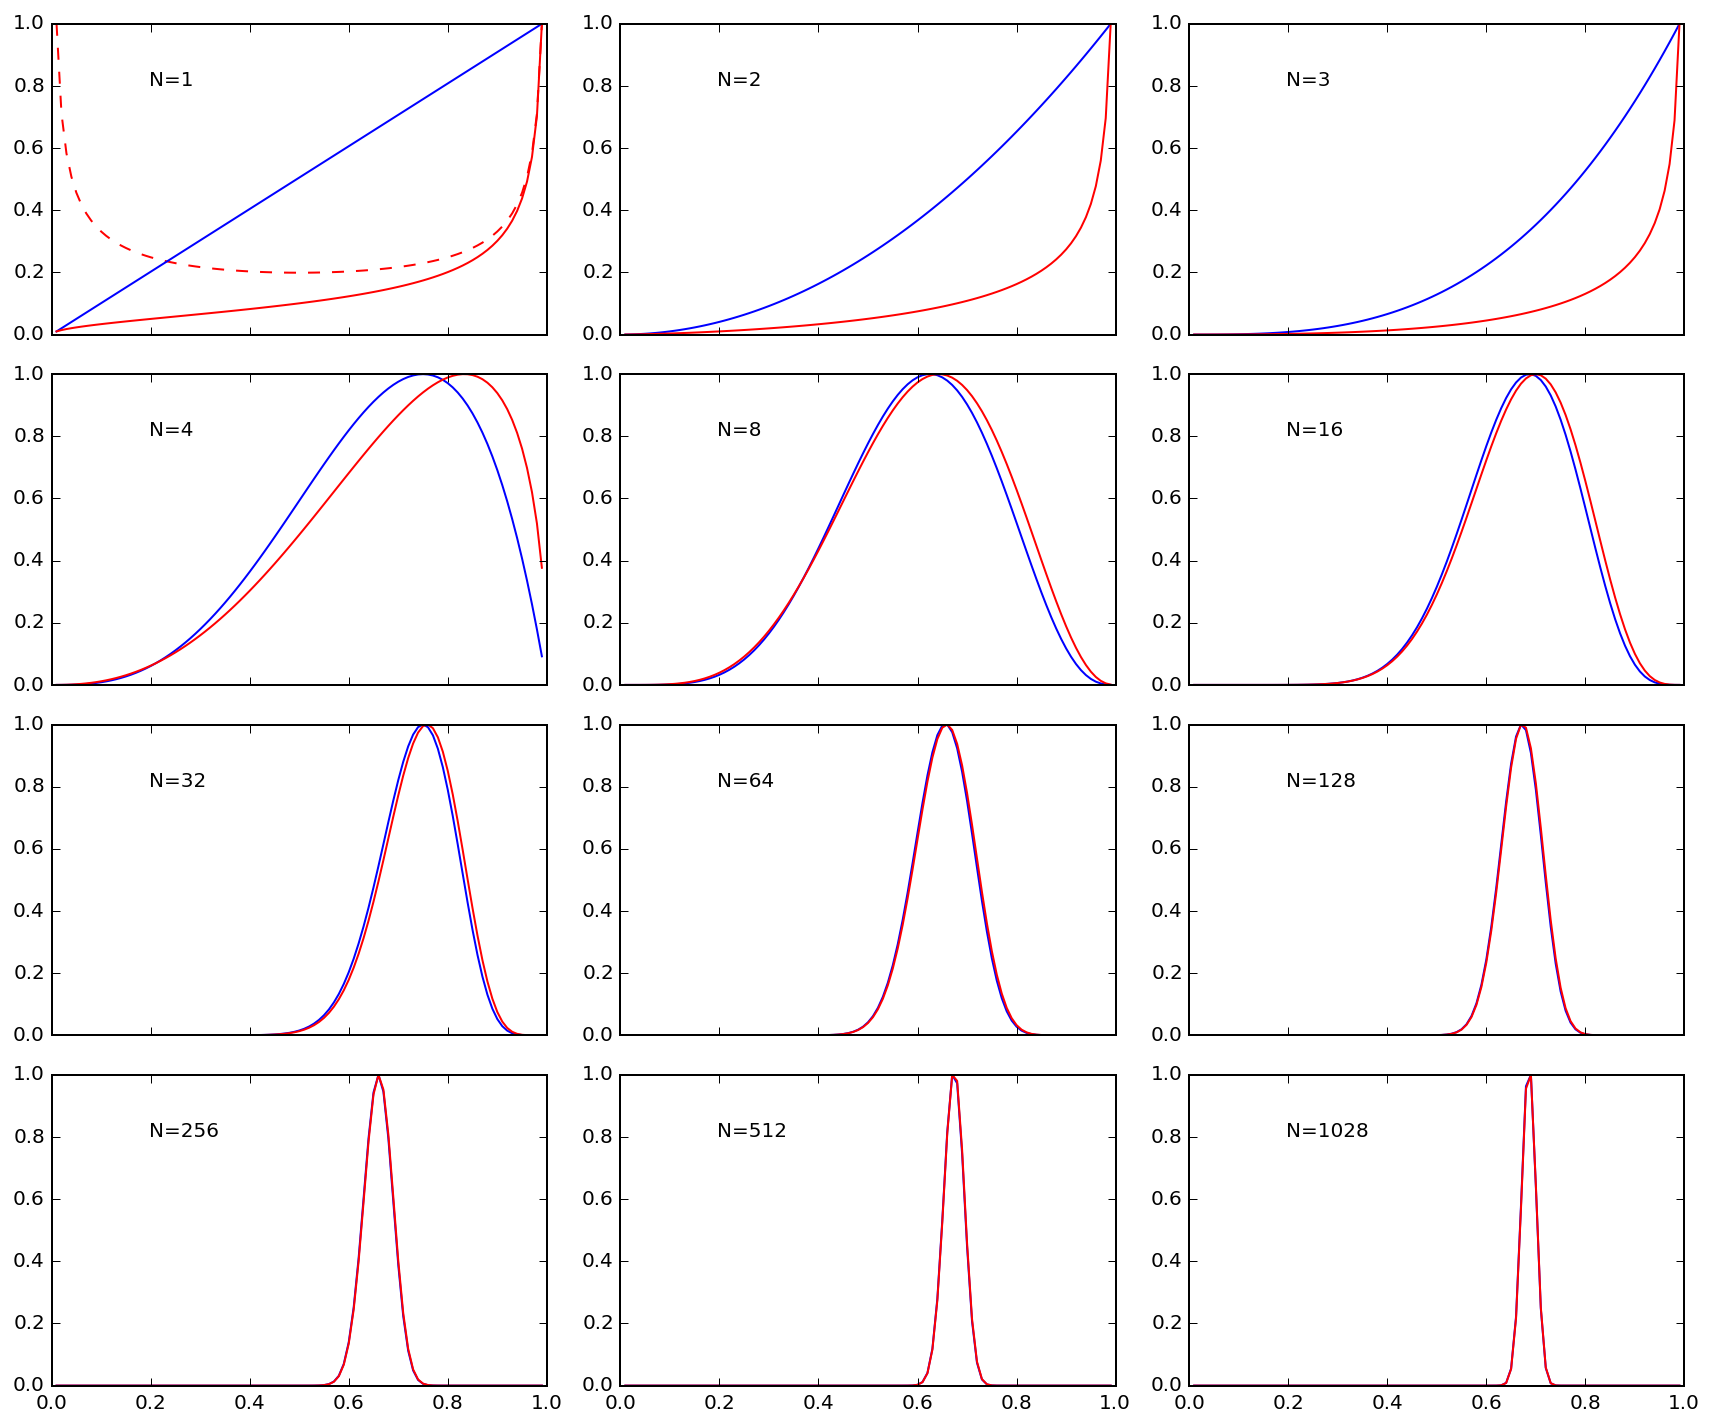

In [72]:
p = 0.7
sizes = np.array([1,2,3,4,8,16,32,64,128,256,512,1028])
fig, ax = plt.subplots(ncols=3,nrows=4,sharex=True,figsize=[4*3,2.5*4])
xplot = np.arange(0.01,1,0.01)
i=j=0
data = binomial(1,p,size=1028)
prior_show = prior2(xplot)
prior_show /= prior_show.max()
ax[0,0].plot(xplot,prior_show,'r--')
for s in sizes:
    res = posterior(data[:s], xplot)
    res /= res.max()
    res2 = posterior2(data[:s],xplot)
    res2 /= res2.max()
    ax[j,i].plot(xplot,res)
    ax[j,i].plot(xplot,res2,'r')
    ax[j,i].annotate('N='+str(s), xy=(0.2, 0.8))
    i = i+1
    if (i > 2):
        i=0
        j=j+1
fig.tight_layout()